In [1]:
! git clone https://github.com/Nelson-Gon/cytounet.git

Cloning into 'cytounet'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 994 (delta 60), reused 68 (delta 30), pack-reused 896
Receiving objects: 100% (994/994), 51.34 MiB | 30.27 MiB/s, done.
Resolving deltas: 100% (447/447), done.


In [2]:
%cd cytounet 

/kaggle/working/cytounet


In [3]:
from cytounet.model import *
from cytounet.augmentation import *
from cytounet.data import * 

Using TensorFlow backend.


In [4]:
data_gen_args = dict(rotation_range=0.1,
                      rescale = 1./255,
                    width_shift_range=0.1,
                    height_shift_range=0.05,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest') 

In [ ]:
# augmentation will take up a lot of space, only use if you have enough space on disk
#! if [ ! -d "aug" ]; then mkdir aug aug/images aug/masks;fi

In [5]:
my_generator = generate_train_data(5,'examples/legacy/data/train','image','label',
                                   data_gen_args,save_to_dir = None, seed= 2,
                              target_size = (256, 256))

In [6]:
model = unet(input_size = (256, 256, 1), optimiser='Adam', learning_rate=1e-4, 
             metrics=[dice_coef], loss=dice_coef_loss)

In [7]:
history = train(model, my_generator, epochs = 5, steps_per_epoch= 200,verbose=1, 
                save_as="unet_segment.hdf5") 

Epoch 1/5
Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
200/200 [==============================] - 382s 2s/step - loss: 0.1790 - dice_coef: 0.8210
Epoch 2/5
200/200 [==============================] - 378s 2s/step - loss: 0.1138 - dice_coef: 0.8862
Epoch 3/5
200/200 [==============================] - 388s 2s/step - loss: 0.0718 - dice_coef: 0.9282
Epoch 4/5
200/200 [==============================] - 378s 2s/step - loss: 0.0628 - dice_coef: 0.9372
Epoch 5/5
200/200 [==============================] - 391s 2s/step - loss: 0.0595 - dice_coef: 0.9405


In [8]:
# run if not done before
! rm examples/legacy/data/test/*_predict.png && ls examples/legacy/data/test 

0.png	11.png	14.png	17.png	2.png	22.png	25.png	28.png	4.png  7.png
1.png	12.png	15.png	18.png	20.png	23.png	26.png	29.png	5.png  8.png
10.png	13.png	16.png	19.png	21.png	24.png	27.png	3.png	6.png  9.png


In [12]:
! ls examples/legacy/data/test

0.png	11.png	14.png	17.png	2.png	22.png	25.png	28.png	4.png  7.png
1.png	12.png	15.png	18.png	20.png	23.png	26.png	29.png	5.png  8.png
10.png	13.png	16.png	19.png	21.png	24.png	27.png	3.png	6.png  9.png


In [16]:
! mkdir examples/legacy/data/test/images && mv examples/legacy/data/test/*.png examples/legacy/data/test/images  

In [40]:
results = predict(test_path="examples/legacy/data/test", model_weights = "unet_segment.hdf5",
                 train_seed = 2, custom_loss = {'dice_coef': dice_coef,
                                               'dice_coef_loss': dice_coef_loss})

Found 30 images belonging to 1 classes.


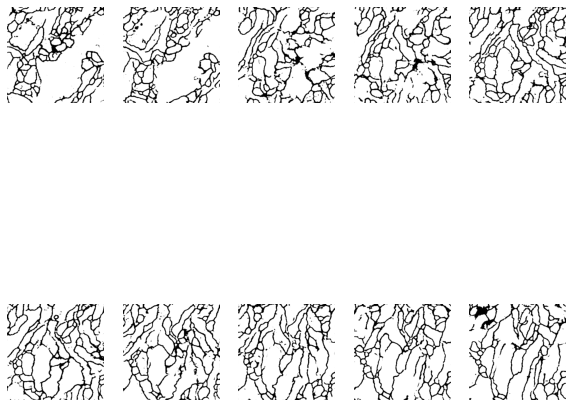

In [41]:
show_images(results, number = 10 )

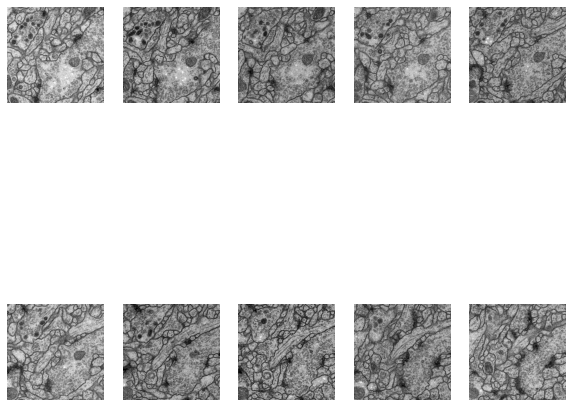

In [42]:
show_images("examples/legacy/data/test/images", image_suffix="png", number=10)